[*********************100%***********************]  4 of 4 completed

Erro no download: 'Adj Close'


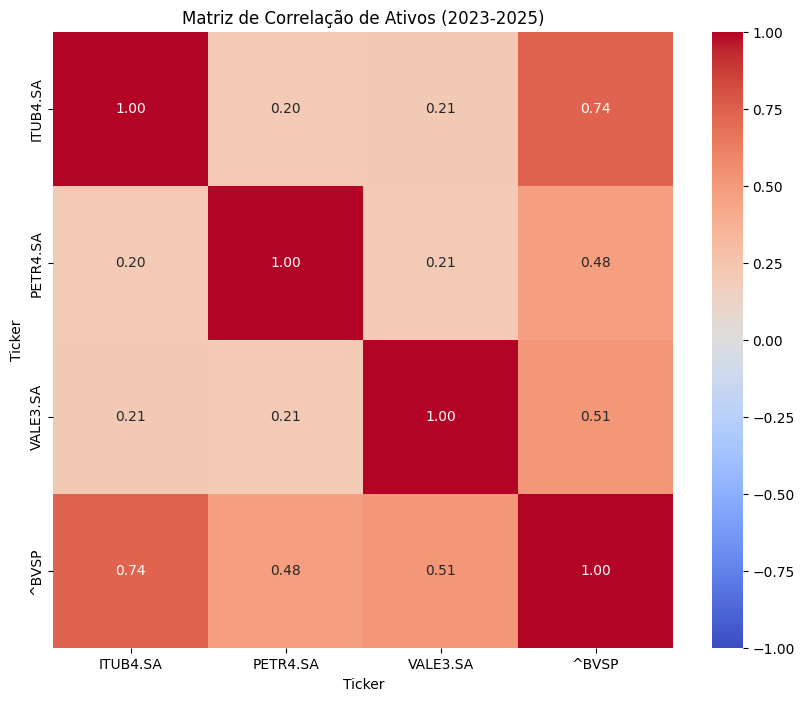

: 

In [ ]:
#dados do yahoo finance
import yfinance as yf
#complemento graficos
import seaborn as sns
#graficos
import matplotlib.pyplot as plt
#receber dados e organizar
import pandas as pd

#lista de ativos da lib yfinance
#PETR4.SA = Petrobras
#VALE3.SA = Vale
#ITUB4.SA = Itau
#BVSP = Indice Bovespa
ativos = ["PETR4.SA", "VALE3.SA", "ITUB4.SA", "^BVSP"]

#periodo dinamico
inicio = "2023-01-01"

#download com tratamento (threads=False para evitar o erro de database locked)
#tratamento de exceções no download (falhas de conexão ou indisponibilidade do yahoo finance)
try:
    df = yf.download(ativos, start=inicio, threads=False)['Adj Close']
except Exception as e:
    print(f"Erro no download: {e}")
    exit()

#tratamento de Erros
#se o download falhar, o DF pode vir vazio.
if df.empty:
    print("Erro ao baixar dados. Tente novamente em alguns segundos.")
else:
    #remove linhas onde TODOS os ativos estão nulos
    df = df.dropna(how='all')
    
    #cálculo de Retornos (Corrigindo o Warning do fill_method)
    retornos = df.pct_change(fill_method=None).dropna()

    #criando a matriz de correlação
    correlacao = retornos.corr()

    #plotando
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    plt.title("Matriz de Correlação de Ativos (2023-2025)")
    plt.show()